In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/DELL/Downloads/assignment/logistic regression/bank-full.csv", sep = ';' )

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
data.shape

(45211, 17)

In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
df = pd.get_dummies(data, columns=['job', 'marital','education','contact' , 'poutcome'])

In [11]:
df.shape

(45211, 38)

In [12]:
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [13]:
pd.set_option("display.max.columns", None)
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [14]:
df['default'] = np.where(df['default'].str.contains("yes"),1,0)
df['housing'] = np.where(df['housing'].str.contains("yes"),1,0)
df['loan'] = np.where(df['loan'].str.contains("yes"),1,0)
df['y'] = np.where(df['y'].str.contains("yes"),1,0)


In [15]:
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [16]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [17]:
arrange = {'month':{'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7,'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}}

In [18]:
df= df.replace(arrange)
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [19]:
df.shape

(45211, 38)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int32
 12  job_admin.           45211 non-null  uint8
 13  job_blue-collar      45211 non-null  uint8
 14  job_entrepreneur     45211 non-null  uint8
 15  job_housemaid        45211 non-null  uint8
 16  job_management       4

# Model Building

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report


In [22]:
# Dividing into X and Y

X = df.drop(['y'], axis=1)
Y = df['y']


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state =25)

In [24]:


model = LogisticRegression()
model.fit(x_train, y_train)



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
model.score(x_train,y_train)

0.8893220526432205

In [26]:
model.score(x_test,y_test)

0.8932876257879022

In [27]:
y_pred_tr = model.predict(x_train)

In [28]:
confusionmatrix_tr =  confusion_matrix(y_train,y_pred_tr)
confusionmatrix_tr

array([[31466,   438],
       [ 3565,   699]], dtype=int64)

In [29]:
print(classification_report(y_train,y_pred_tr)) # train data

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     31904
           1       0.61      0.16      0.26      4264

    accuracy                           0.89     36168
   macro avg       0.76      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [30]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
y_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
y_pred_df['correct'] = y_pred_df['Actual']== y_pred_df['Predicted']

y_pred_df['correct'].value_counts()

True     8078
False     965
Name: correct, dtype: int64

In [32]:
confusionmatrix = confusion_matrix(y_test, y_pred)
confusionmatrix

array([[7906,  112],
       [ 853,  172]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred)) # test data

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8018
           1       0.61      0.17      0.26      1025

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.60      9043
weighted avg       0.87      0.89      0.87      9043



In [34]:
 #as accuracy is 0.89, which is greater than 0.5, thus, [:,1] (Threshold value>0.5 = 1) else [:,0] (Threshold Value,0.5 = 0)
model.predict_proba(X)[:,1]

array([0.07580973, 0.05954651, 0.05366466, ..., 0.43637627, 0.0711102 ,
       0.46952217])

In [35]:
# Roc_Curve

fpr, tpr,threshold = roc_curve(Y, model.predict_proba(X)[:,1])

auc = roc_auc_score(y_test, y_pred)

Auc accuracy is  0.5769181536664456


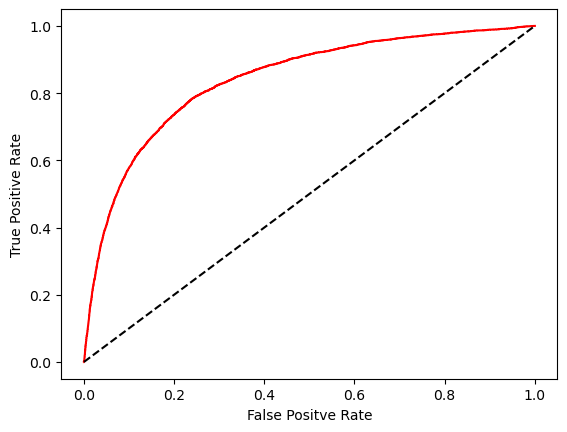

In [36]:
plt.plot(fpr,tpr, color='red', label = 'logit model' %auc)
plt.plot([0,1],[0,1], 'k--')

plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")

print('Auc accuracy is ', auc)
